In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import os

In [2]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [3]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Healthcare-images-classification/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)


Found 224 files belonging to 4 classes.


In [4]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Healthcare-images-classification/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 110 files belonging to 4 classes.


In [5]:
## loading test dataset
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Healthcare-images-classification/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 106 files belonging to 4 classes.


In [7]:
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= validation_ds, epochs = 80)

Epoch 1/80
3/3 [==============================] - 118s 18s/step - loss: 7.8483 - accuracy: 0.3884 - val_loss: 85.3137 - val_accuracy: 0.3455
Epoch 2/80
3/3 [==============================] - 1s 605ms/step - loss: 5.7591 - accuracy: 0.4107 - val_loss: 5.9163 - val_accuracy: 0.3909
Epoch 3/80
3/3 [==============================] - 1s 605ms/step - loss: 0.9162 - accuracy: 0.6741 - val_loss: 2.9360 - val_accuracy: 0.3909
Epoch 4/80
3/3 [==============================] - 1s 597ms/step - loss: 0.4159 - accuracy: 0.8482 - val_loss: 2.0085 - val_accuracy: 0.6000
Epoch 5/80
3/3 [==============================] - 1s 586ms/step - loss: 0.2905 - accuracy: 0.8839 - val_loss: 8.0864 - val_accuracy: 0.3909
Epoch 6/80
3/3 [==============================] - 1s 597ms/step - loss: 0.1216 - accuracy: 0.9732 - val_loss: 3.4895 - val_accuracy: 0.6182
Epoch 7/80
3/3 [==============================] - 1s 588ms/step - loss: 0.0728 - accuracy: 0.9732 - val_loss: 4.9149 - val_accuracy: 0.4182
Epoch 8/80
3/3 [===

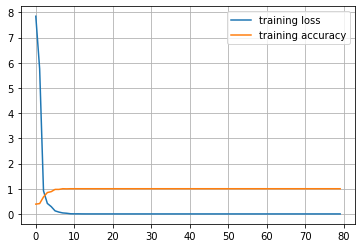

In [9]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

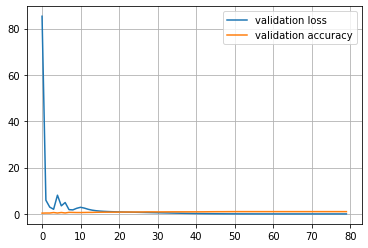

In [10]:
## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

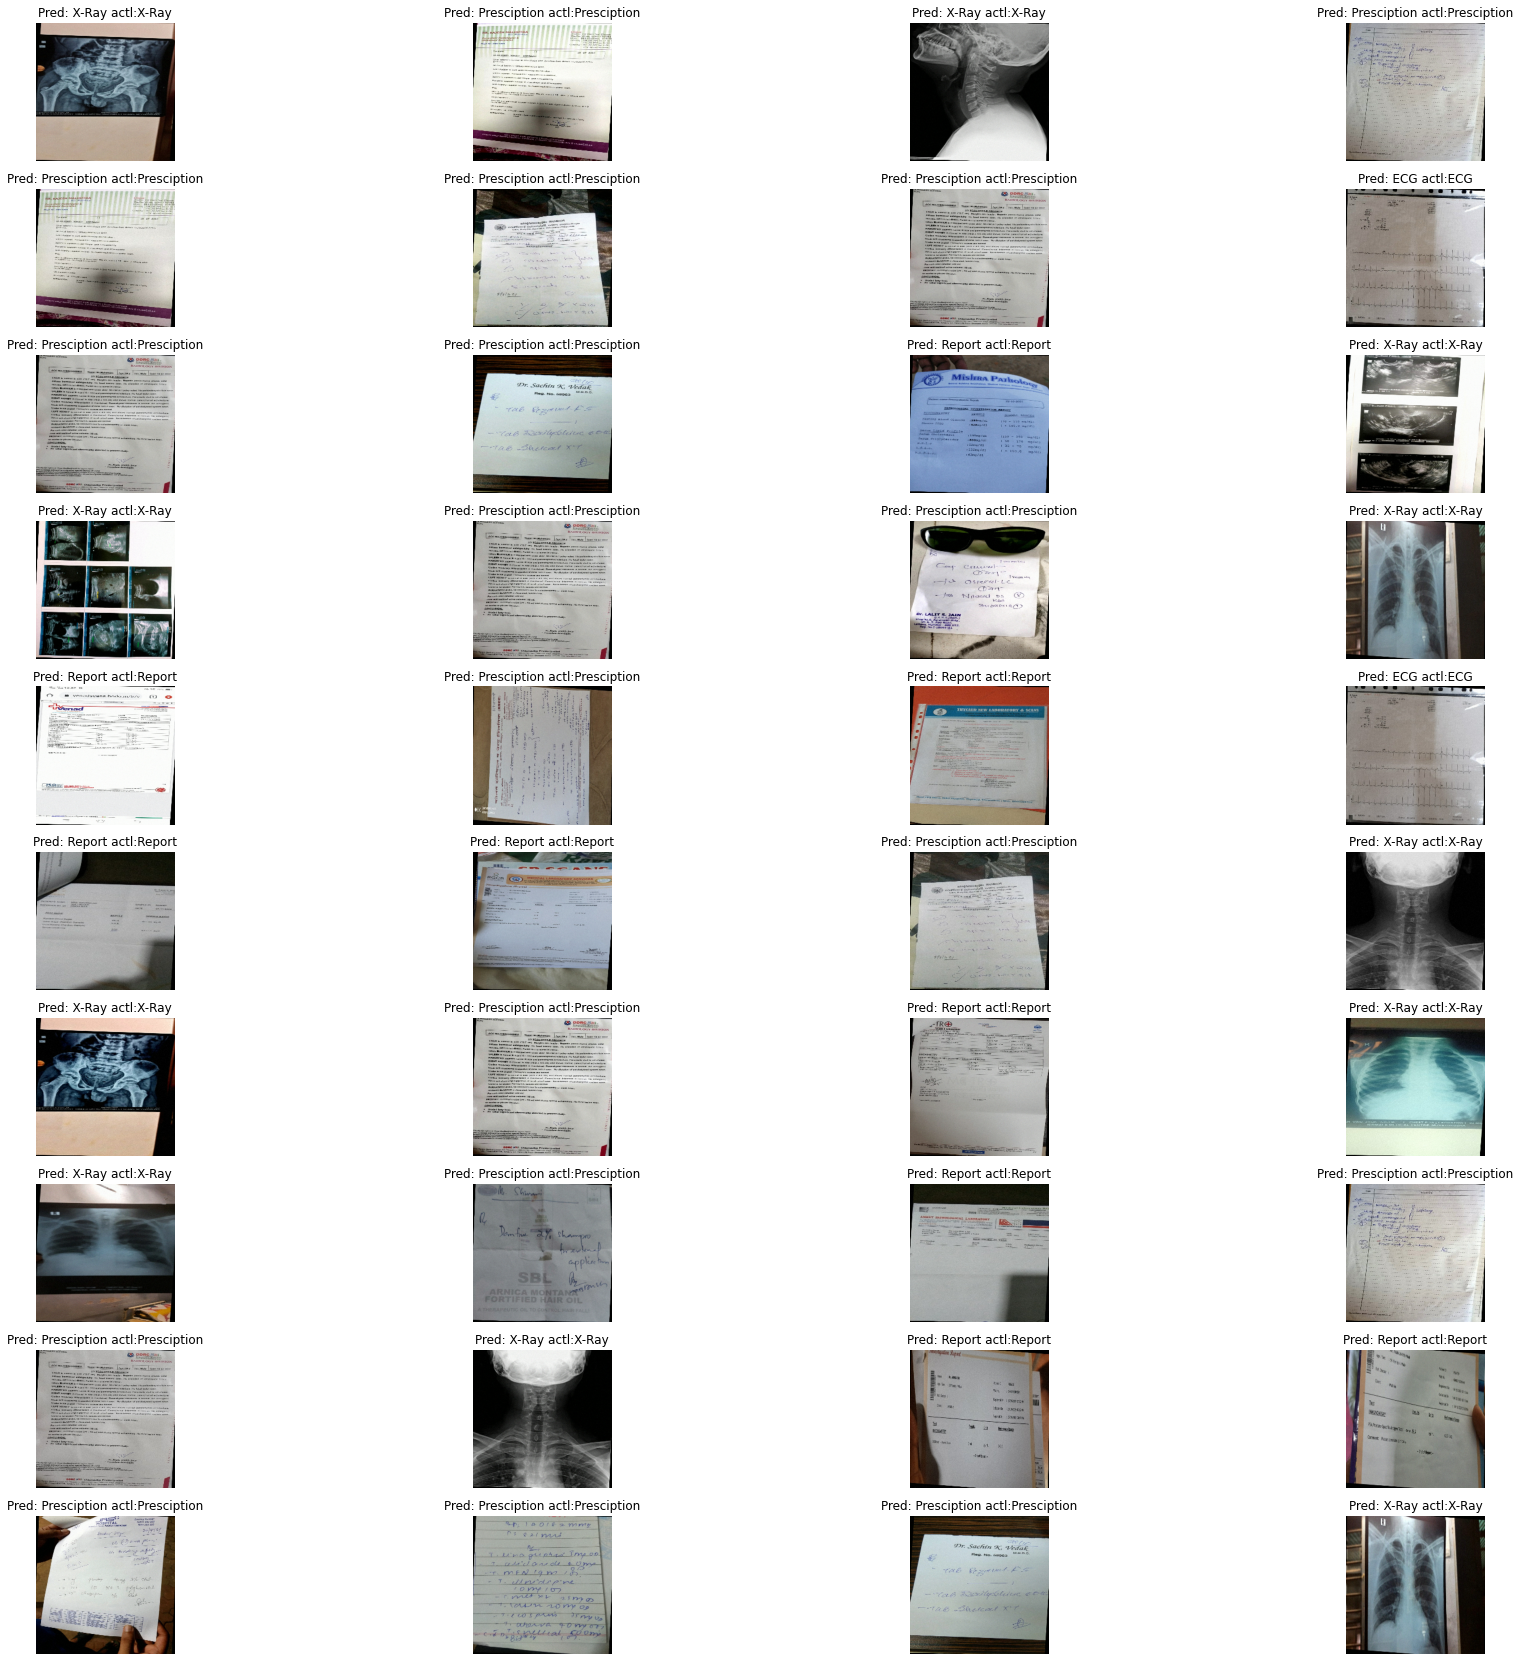

In [11]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [ ]:
MyCnn.save('/content/drive/MyDrive/Healthcare-images-classification/Model.h5')